In [1]:
%load_ext autoreload
%autoreload 2

import crispr_hmm
import random
import matplotlib.pyplot as plt
import numpy as np
from Bio import pairwise2
import csv
from math import log
import os
import regex
from Bio import SeqIO

/homes8/jingyuan/.local/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
len("CATGGTGCATCTGACTCCTG")

20

In [3]:
ref = "ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG"

fq_file = "./data/nhej/SRR3192757/SRR3192757_trim2.fastq"
data = SeqIO.parse(fq_file,"fastq")
counter = {}
for record in data:
    t = record.seq._data.decode()
    if t.count("N")>0:
        continue
    if t not in counter:
        counter[t] = 1
    else:
        counter[t] += 1
len(counter)

10445

In [4]:
top_500_sequences = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:500]
top_500_sequences = [i for i in top_500_sequences if i[0] != ref]
top_500_sequences

[('ACACCATGGTGCATCTGACTCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 340268),
 ('ACACCATGGTGCATCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 97501),
 ('ACACCATGGTGCATCTGACTGTGGAGAAGTCTGCCGTTACTGCCCTG', 47828),
 ('ACACCATGGTGCATCTGACTCCCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 33429),
 ('ACACCATGGTGCATCTGACTCGTGGAGAAGTCTGCCGTTACTGCCCTG', 25841),
 ('ACACCATGGTGCATCTGACTCTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 15875),
 ('ACACCATGGTGGAGAAGTCTGCCGTTACTGCCCTG', 10990),
 ('ACACCATGGTGCATCTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 10795),
 ('ACACCATGGTGCATCTGCCGTTACTGCCCTG', 10143),
 ('ACACCATGGTGCATCTGACTCGAGAAGTCTGCCGTTACTGCCCTG', 9607),
 ('ACACCATGTGGAGAAGTCTGCCGTTACTGCCCTG', 8598),
 ('ACACCATGGAGAAGTCTGCCGTTACTGCCCTG', 8330),
 ('ACACCATGGTGCATCTGACTCGGAGAAGTCTGCCGTTACTGCCCTG', 7976),
 ('ACACCATGGTGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 7715),
 ('ACACCATGCTGTGGAGAAGTCTGCCGTTACTGCCCTG', 7630),
 ('ACACCATGGTGCATCTGACTCGAAGTCTGCCGTTACTGCCCTG', 7181),
 ('ACACCATGGTGCATCTGACTCAGAAGTCTGCCGTTACTGCCCTG', 5633),
 ('ACACCATGGTGCATCTGACTCAAGTCTGCCGTTACTGCCCTG'

In [5]:
top_sequences = [key for key, value in top_500_sequences for _ in range(value)]
len(top_sequences)

934224

In [6]:
model = crispr_hmm.hmm_model(ref)
model.estimate_param(top_sequences,ncores=5)

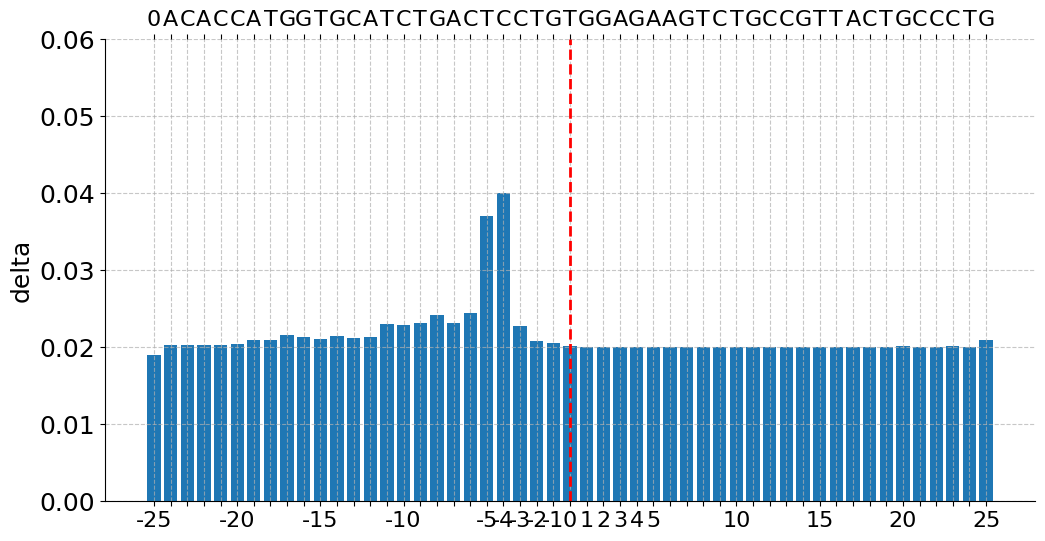

In [8]:
# Get the y-axis values
y_values = getattr(model, "delta")

# Define a pretty shade of blue
pretty_blue = "#1f77b4"

param = "delta"
fig, ax = plt.subplots(figsize=(12, 6))
pos = [j for j in range(model.n + 1)]

# Use the pretty shade of blue for the bars
ax.bar(pos, y_values, color=pretty_blue)

pos_tick = [str(i-25) if abs(i-25)<6 or (i-25) % 5 ==0 \
            else "" for i in range(model.n+1)]
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)
ax.set_ylim((0, 0.06))

ax.set_ylabel("%s" % param, fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

# Add a thin vertical grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
bar = ["0"] + [j for j in model.reference_sequence]
ax2.set_xticks(pos)
ax2.set_xticklabels(bar, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a vertical line at x-position 5
ax.axvline(x=25, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

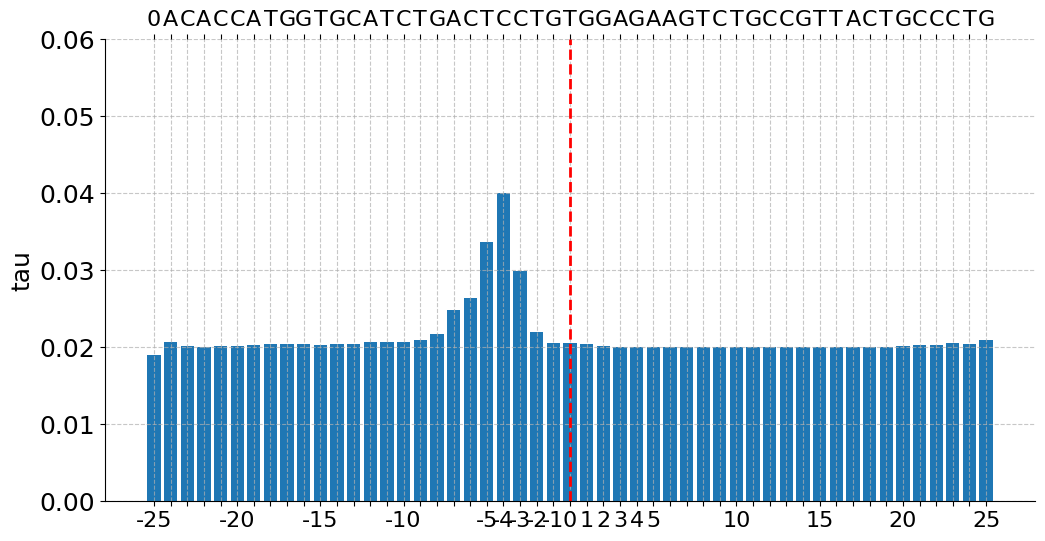

In [9]:
# Get the y-axis values
y_values = getattr(model, "tau")

# Define a pretty shade of blue
pretty_blue = "#1f77b4"

param = "tau"
fig, ax = plt.subplots(figsize=(12, 6))
pos = [j for j in range(model.n + 1)]

# Use the pretty shade of blue for the bars
ax.bar(pos, y_values, color=pretty_blue)

pos_tick = [str(i-25) if abs(i-25)<6 or (i-25) % 5 ==0 \
            else "" for i in range(model.n+1)]
ax.set_xticks(pos)
ax.set_xticklabels(pos_tick, fontsize=16)
ax.set_ylim((0, 0.06))

ax.set_ylabel("%s" % param, fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)

# Add a thin vertical grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a secondary x-axis on the top
ax2 = ax.twiny()

# Set the tick positions and labels for the secondary x-axis
bar = ["0"] + [j for j in model.reference_sequence]
ax2.set_xticks(pos)
ax2.set_xticklabels(bar, fontsize=16)

# Remove the spines for the secondary x-axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Align the secondary x-axis with the primary x-axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())

# Add a vertical line at x-position 5
ax.axvline(x=25, color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

In [10]:
t = "ACACCATGGTGCATCTGACTCTGTGGAGAAGTCTGCCGTTACTGCCCTG"
t = "ACACCATGGTGCATCTGTGGAGAAGTCTGCCGTTACTGCCCTG"

for r in model.viterbi([t]):
    print(r[0])
    print(r[1])
    print(r[2])

ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
ACACCATGGTGCATCTG-------TGGAGAAGTCTGCCGTTACTGCCCTG
-14.54426062134623


In [11]:
align = pairwise2.align.globalms(ref,
                    t,
                    2,
                    -2,
                    -6,
                    -0.1,
                    penalize_end_gaps=1)
for a in align:
    print(a[0])
    print(a[1])
    print(a[2])

ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
ACACCATGGTGCAT-------CTGTGGAGAAGTCTGCCGTTACTGCCCTG
79.39999999999999
ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
ACACCATGGTGCATC-------TGTGGAGAAGTCTGCCGTTACTGCCCTG
79.39999999999999
ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
ACACCATGGTGCATCT-------GTGGAGAAGTCTGCCGTTACTGCCCTG
79.39999999999999
ACACCATGGTGCATCTGACTCCTGTGGAGAAGTCTGCCGTTACTGCCCTG
ACACCATGGTGCATCTG-------TGGAGAAGTCTGCCGTTACTGCCCTG
79.39999999999999


In [12]:
print(model.calculate_alignment_probability(ref,align[0][1],use_log=True))
print(model.calculate_alignment_probability(ref,align[1][1],use_log=True))
print(model.calculate_alignment_probability(ref,align[2][1],use_log=True))

-14.592882878248313
-14.598072300855378
-14.585178227624642


In [11]:
filtered_reads = [key for key, value in counter.items() for _ in range(value)]

NW_result = []
random.seed(10)
for t in filtered_reads:
    align = pairwise2.align.globalms(ref,
                    t,
                    2,
                    -2,
                    -10,
                    -0.1,
                    penalize_end_gaps=1)
    random_alignment = random.sample(align,1)
    NW_result.append(random_alignment[0][:3])
    
with open("./output/NW_result.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["aligned_ref","aligned_read","score"])
    for row in NW_result:
        writer.writerow(row)

In [12]:
HMM_result = []

for r in model.viterbi(filtered_reads,ncores=10):
    HMM_result.append(r)

    
with open("./output/HMM_result.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["aligned_ref","aligned_read","score"])
    for row in HMM_result:
        writer.writerow(row)

In [13]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

i = 1
seq_records = []
for read in filtered_reads:
    seq_record = SeqRecord(
        Seq(read),
        id=str(i),
        description='',
        letter_annotations={'phred_quality': [35 for _ in read]}
    )
    seq_records.append(seq_record)
    i += 1


output_fastq = './data/nhej/SRR3192757/SRR3192757_filtered.fastq'
with open(output_fastq, 'w') as out_handle:
    SeqIO.write(seq_records, out_handle, 'fastq')

In [14]:
def generate_fake_sequences(ref, n, length, seed=1):
    random.seed(seed)
    results = []
    i = 0
    while True:
        if i == n:
            break
        
        random_length = random.sample(length, 1)[0]
        loc1 = random.randint(3, min(len(ref)-3, len(ref)-3-random_length))
        loc2 = loc1 + random_length
        
        if loc1 < loc2:
            results.append(ref[:min([loc1,loc2])] + ref[max([loc1,loc2]):])
            i += 1
    return results

length = [len(ref) - len(r) for r in filtered_reads]
length = [i for i in length if i>0]
fake_seqs = generate_fake_sequences(ref, 40000, length, seed=10)

In [15]:
NW_result = []
random.seed(10)
for t in fake_seqs:
    align = pairwise2.align.globalms(ref,
                    t,
                    2,
                    -2,
                    -10,
                    -0.1,
                    penalize_end_gaps=1)
    random_alignment = random.sample(align,1)
    NW_result.append(random_alignment[0][:3])
    
with open("./output/NW_fake_result.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["aligned_ref","aligned_read","score"])
    for row in NW_result:
        writer.writerow(row)

In [16]:
HMM_result = []

for r in model.viterbi(fake_seqs,ncores=10):
    HMM_result.append(r)

with open("./output/HMM_fake_result.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["aligned_ref","aligned_read","score"])
    for row in HMM_result:
        writer.writerow(row)

In [17]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

i = 1
seq_records = []
for read in fake_seqs:
    seq_record = SeqRecord(
        Seq(read),
        id=str(i),
        description='',
        letter_annotations={'phred_quality': [35 for _ in read]}
    )
    seq_records.append(seq_record)
    i += 1


output_fastq = './data/nhej/SRR3192757/SRR3192757_fake.fastq'
with open(output_fastq, 'w') as out_handle:
    SeqIO.write(seq_records, out_handle, 'fastq')